In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("LoanApprovalPrediction.csv")


In [ ]:
data.head(5)


In [31]:
# Drop Loan_ID and handle missing values
data.drop(['Loan_ID'], axis=1, inplace=True)

# Calculate mean for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])



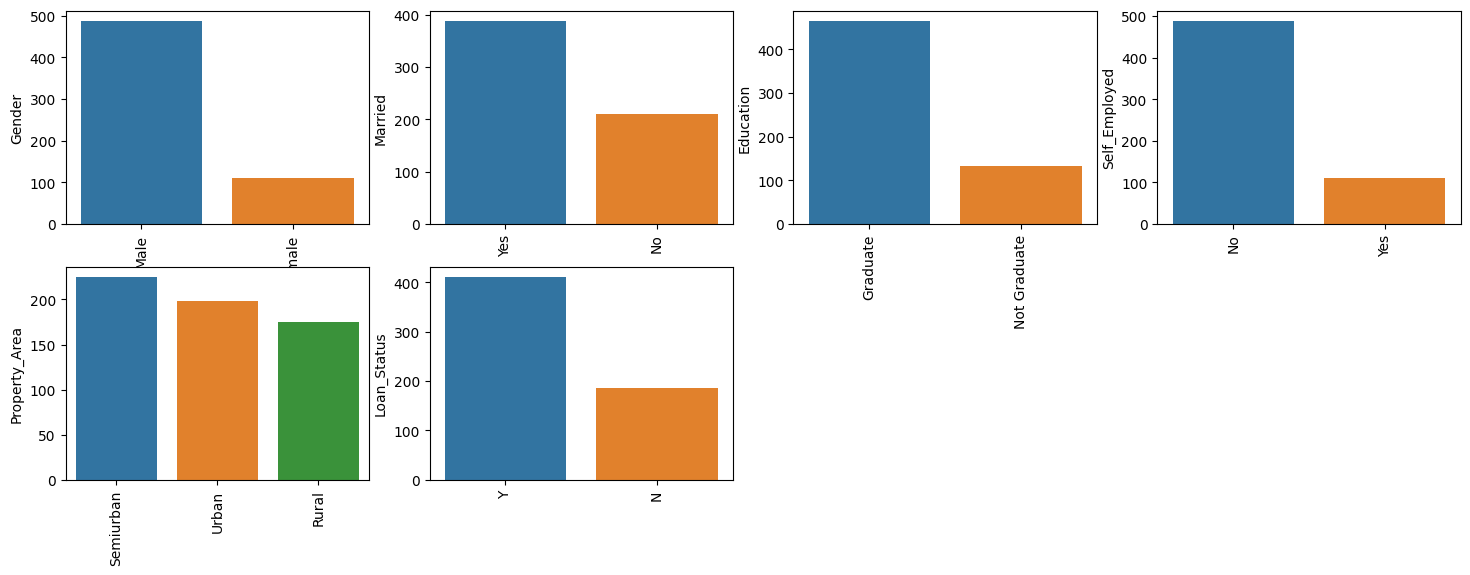

In [33]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [34]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [ ]:

# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

In [ ]:

plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

In [ ]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)

In [ ]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

In [79]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Techniques
knn_bagging = KNeighborsClassifier(n_neighbors=3)  # K Nearest Neighbors

# Bagging (K Nearest Neighbors)
bagging_classifier = BaggingClassifier(base_estimator=knn_bagging, n_estimators=10, random_state=7)
bagging_classifier.fit(X_train, Y_train)

# Predictions on training and test sets
Y_pred_bagging_train = bagging_classifier.predict(X_train)
Y_pred_bagging_test = bagging_classifier.predict(X_test)

# Evaluate Bagging (K Nearest Neighbors) performance
print("Accuracy score of Bagging (K Nearest Neighbors) on training set:",
      100 * metrics.accuracy_score(Y_train, Y_pred_bagging_train))
print("Accuracy score of Bagging (K Nearest Neighbors) on test set:",
      100 * metrics.accuracy_score(Y_test, Y_pred_bagging_test))


Accuracy score of Bagging (K Nearest Neighbors) on training set: 80.44692737430168
Accuracy score of Bagging (K Nearest Neighbors) on test set: 65.83333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [81]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


In [82]:
# Ensemble Techniques
gbc_boosting = GradientBoostingClassifier(n_estimators=50, random_state=7)

# Boosting (Gradient Boosting)
gbc_boosting.fit(X_train, Y_train)

# Predictions on training and test sets
Y_pred_boosting_train = gbc_boosting.predict(X_train)
Y_pred_boosting_test = gbc_boosting.predict(X_test)

# Evaluate Boosting (Gradient Boosting) performance
print("Accuracy score of Boosting (Gradient Boosting) on training set:",
      100 * metrics.accuracy_score(Y_train, Y_pred_boosting_train))
print("Accuracy score of Boosting (Gradient Boosting) on test set:",
      100 * metrics.accuracy_score(Y_test, Y_pred_boosting_test))


Accuracy score of Boosting (Gradient Boosting) on training set: 86.59217877094973
Accuracy score of Boosting (Gradient Boosting) on test set: 79.58333333333333


### **Random Forest Classifier is giving the best accuracy with an accuracy score of 82.5% for the testing dataset.**

In [85]:
# Prepare the input data (replace values as needed)
input_data = [
    ['Male', 'Yes', '1', 'Graduate', 'No', 5000, 2000, 150, 360, 1, 'Urban']
]

# Create a DataFrame for the input data
input_df = pd.DataFrame(input_data, columns=[
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Property_Area'
])

# Convert categorical variables to numerical using label encoding
object_cols = input_df.select_dtypes(include=['object']).columns
for col in object_cols:
    input_df[col] = pd.Categorical(input_df[col]).codes

# Reshape the input data
input_data_reshaped = input_df.values.reshape(1, -1)

# Make predictions using the Random Forest model
prediction_rfc = rfc.predict(input_data_reshaped)

# Display the prediction
if prediction_rfc[0] == 1:
    print("Loan Approval: Approved")
else:
    print("Loan Approval: Not Approved")


Loan Approval: Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
